## Set up repo and run ISR from command-line with butler and pipetask

## Ingest a gen3 reference catalog

### Create a gen2 reference catalog

In [1]:
import pandas as pd
import numpy as np

In [2]:
test_cat = np.genfromtxt('/astro/store/epyc/users/brycek/Commissioning/aos/aoclc_runs/lsstCam_rotSkyPos/starSingle_rotSkyPos.cat', 
                         usecols=[1, 2, 3, 4], names=['id', 'ra', 'dec', 'g'])

In [3]:
test_cat[:5]

array([(0., 359.847457, -0.237026, 15.), (1., 359.847482, -0.220341, 15.),
       (2., 359.847507, -0.203656, 15.), (3., 359.847532, -0.186972, 15.),
       (4., 359.847557, -0.170287, 15.)],
      dtype=[('id', '<f8'), ('ra', '<f8'), ('dec', '<f8'), ('g', '<f8')])

In [4]:
test_cat_df = pd.DataFrame(test_cat, columns=['id', 'ra', 'dec', 'g'])

In [5]:
test_cat_df

,id,ra,dec,g
0,0.0,359.847457,-0.237026,15.0
1,1.0,359.847482,-0.220341,15.0
2,2.0,359.847507,-0.203656,15.0
3,3.0,359.847532,-0.186972,15.0
4,4.0,359.847557,-0.170287,15.0
5,5.0,359.764024,-0.153728,15.0
6,6.0,359.780735,-0.153703,15.0
7,7.0,359.797447,-0.153678,15.0
8,8.0,359.814158,-0.153652,15.0
9,9.0,359.830870,-0.153627,15.0


In [6]:
test_cat_df['g_err'] = 0.1

In [7]:
test_cat_df.to_csv('/astro/store/epyc/users/brycek/Commissioning/aos/aoclc_runs/lsstCam_rotSkyPos/starSingle_rotSkyPos.txt', index=False)

In [8]:
! mkdir /astro/store/epyc/users/brycek/Commissioning/aos/aoclc_repos/test_refcat
! echo "lsst.obs.lsst.LsstCamMapper" > /astro/store/epyc/users/brycek/Commissioning/aos/aoclc_repos/test_refcat/_mapper

In [9]:
! ingestReferenceCatalog.py /astro/store/epyc/users/brycek/Commissioning/aos/aoclc_repos/test_refcat/ /astro/store/epyc/users/brycek/Commissioning/aos/aoclc_runs/lsstCam_rotSkyPos/starSingle_rotSkyPos.txt --configfile my_ref.cfg

/astro/store/epyc/projects/lsst_comm/stack_w_2021_14/stack/miniconda3-py38_4.9.2-0.4.3/Linux64/pipe_base/21.0.0-16-g0fb55c1+b60e2d390c/python/lsst/pipe/base/argumentParser.py:690: FutureWarning: Gen2 Butler has been deprecated (Butler). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  namespace.butler = dafPersist.Butler(outputs=outputs)
/astro/store/epyc/projects/lsst_comm/stack_w_2021_14/stack/miniconda3-py38_4.9.2-0.4.3/Linux64/pipe_base/21.0.0-16-g0fb55c1+b60e2d390c/python/lsst/pipe/base/argumentParser.py:690: FutureWarning: Gen2 Butler has been deprecated (LsstCamMapper). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  namespace.butler = dafPersist.Butler(outputs=outputs)
LsstCamMapper WARN: Unable to find valid calib root directory
CameraMapper INFO: Loading Posix exposure registry from /astro/store/epyc/users/brycek/Commissioning/aos/aoclc_repos/test_refcat
root INFO: Running: /astro/store/epyc/projects/lsst_comm/stack

### Run gen2 -> gen3 conversion

Currently this is the only way to get a gen3 reference catalog.

In [16]:
# Create conversion configuration file
! echo 'config.datasetIncludePatterns = ["ref_cat", ]' > convertRefCat.cfg
# ! echo 'config.datasetIgnorePatterns = ["*raw*"]' > convertRefCat.cfg
# ! echo 'config.runs = {"IngestIndexedReferenceTask_config": "refcats/gen2", "ref_cat_config": "refcats/gen2"}' >> convertRefCat.cfg
! echo 'config.refCats = ["cal_ref_cat"]' >> convertRefCat.cfg

In [17]:
! cat convertRefCat.cfg

config.datasetIncludePatterns = ["ref_cat", ]
config.refCats = ["cal_ref_cat"]


In [171]:
# Note this now also creates the curated calib files
! butler convert --gen2root /astro/store/epyc/users/brycek/Commissioning/aos/aoclc_repos/test_refcat/ --config-file convertRefCat.cfg /astro/store/epyc/users/brycek/Commissioning/aos/aoclc_repos/rotWcsTest_newHeader

LsstCamMapper WARN: Unable to find valid calib root directory
LsstCamMapper WARN: Unable to find valid calib root directory
convertRepo INFO: Preparing ref_cat cal_ref_cat from root /astro/store/epyc/users/brycek/Commissioning/aos/aoclc_repos/test_refcat.
convertRepo INFO: Looking for skymaps in root /astro/store/epyc/users/brycek/Commissioning/aos/aoclc_repos/test_refcat.
convertRepo INFO: Preparing other dataset types from root /astro/store/epyc/users/brycek/Commissioning/aos/aoclc_repos/test_refcat.
convertRepo INFO: Adding special datasets in repo /astro/store/epyc/users/brycek/Commissioning/aos/aoclc_repos/test_refcat.
convertRepo INFO: Finding datasets from files in repo /astro/store/epyc/users/brycek/Commissioning/aos/aoclc_repos/test_refcat.
convertRepo INFO: Expanding data IDs for 1 non-calibration dataset of type cal_ref_cat.
convertRepo INFO: Ingesting 1 dataset into run refcats/gen2 of type cal_ref_cat.
convertRepo INFO: Defining LSSTCam/defaults from chain ['refcats', 'LSS

In [172]:
! butler register-instrument /astro/store/epyc/users/brycek/Commissioning/aos/aoclc_repos/rotWcsTest_newHeader lsst.obs.lsst.LsstCam

In [173]:
# ! butler write-curated-calibrations /astro/store/epyc/users/brycek/Commissioning/aos/aoclc_repos/rotWcsTest lsst.obs.lsst.LsstCam

In [174]:
! butler ingest-raws /astro/store/epyc/users/brycek/Commissioning/aos/aoclc_repos/rotWcsTest_newHeader /astro/store/epyc/users/brycek/Commissioning/aos/aoclc_runs/lsstCam_rotSkyPos/repackaged_new_header/*.fits

ingest INFO: Successfully extracted metadata from 3 files with 0 failures
ingest INFO: Exposure LSSTCam:MC_H_20000217_006001 ingested successfully
ingest INFO: Successfully processed data from 1 exposure with 0 failures from exposure registration and 0 failures from file ingest.
ingest INFO: Ingested 3 distinct Butler datasets


In [175]:
! butler define-visits /astro/store/epyc/users/brycek/Commissioning/aos/aoclc_repos/rotWcsTest_newHeader lsst.obs.lsst.LsstCam

defineVisits INFO: Preprocessing data IDs.
defineVisits INFO: Registering visit_system 1: by-group-metadata.
defineVisits INFO: Grouping 1 exposure(s) into visits.
defineVisits INFO: Computing regions and other metadata for 1 visit(s).


### Run task

In [176]:
! pipetask run -b /astro/store/epyc/users/brycek/Commissioning/aos/aoclc_repos/rotWcsTest_newHeader/ -i LSSTCam/raw/all,LSSTCam/calib,refcats -p testLsstCamPipeline.yaml --register-dataset-types --output-run run1

ctrl.mpexec.cmdLineFwk INFO: QuantumGraph contains 3 quanta for 1 tasks, graph ID: '1620236931.8454933-53229'
conda.common.io INFO: overtaking stderr and stdout
conda.common.io INFO: stderr and stdout yielding back
isr INFO: Converting exposure to floating point values.
isr INFO: Assembling CCD from amplifiers.
isr INFO: Widening saturation trails.
isr INFO: Applying gain correction instead of flat.
isr WARN: No rough magnitude zero point set for filter FilterLabel(band="g", physical="g").
isr INFO: Setting rough magnitude zero point: 28.000000
ctrl.mpexec.singleQuantumExecutor INFO: Execution of task 'isr' on quantum {instrument: 'LSSTCam', detector: 90, exposure: 4000021706001, ...} took 6.722 seconds
ctrl.mpexec.mpGraphExecutor INFO: Executed 1 quanta, 2 remain out of total 3 quanta.
isr INFO: Converting exposure to floating point values.
isr INFO: Assembling CCD from amplifiers.
isr INFO: Widening saturation trails.
isr INFO: Applying gain correction instead of flat.
isr WARN: No r

In [99]:
# ! butler prune-collection test_gen3/ run1 --purge --unstore

## Look inside repo

In [100]:
from lsst.daf import butler as dafButler

In [101]:
refButler = dafButler.Butler('/astro/store/epyc/users/brycek/Commissioning/aos/aoclc_repos/rotWcsTest/')

In [177]:
refButler_newHeader = dafButler.Butler('/astro/store/epyc/users/brycek/Commissioning/aos/aoclc_repos/rotWcsTest_newHeader/')

In [102]:
registry = refButler.registry

In [103]:
list(registry.queryCollections())

['LSSTCam/raw/all',
 'LSSTCam/calib',
 'LSSTCam/calib/unbounded',
 'refcats/gen2',
 'refcats',
 'LSSTCam/defaults',
 'skymaps',
 'run1']

In [104]:
dataTypes = registry.queryDatasetTypes()
for dataType in dataTypes:
    print(dataType)

DatasetType('camera', {instrument}, Camera, isCalibration=True)
DatasetType('cal_ref_cat', {htm7}, SimpleCatalog)
DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure)
DatasetType('postISRCCD', {band, instrument, detector, physical_filter, exposure}, Exposure)
DatasetType('isr_metadata', {band, instrument, detector, physical_filter, exposure}, PropertySet)
DatasetType('isr_config', {}, Config)
DatasetType('packages', {}, Packages)


In [105]:
datasetRefs = list(registry.queryDatasets(datasetType='cal_ref_cat', collections=['refcats']).expanded())
for ref in datasetRefs:
    print(ref.dataId)

{htm7: 188416}


In [106]:
refCat = refButler.get('cal_ref_cat', dataId=ref.dataId, collections=['refcats'])

In [107]:
refCatDf = refCat.asAstropy().to_pandas()

In [108]:
refCatDf

,id,coord_ra,coord_dec,g_flux,g_fluxErr
0,0,6.280523,-0.004137,3.630781e+06,334427.458906
1,1,6.280523,-0.003846,3.630781e+06,334427.458906
2,2,6.280524,-0.003554,3.630781e+06,334427.458906
3,3,6.280524,-0.003263,3.630781e+06,334427.458906
4,4,6.280525,-0.002972,3.630781e+06,334427.458906
5,5,6.279067,-0.002683,3.630781e+06,334427.458906
6,6,6.279358,-0.002683,3.630781e+06,334427.458906
7,7,6.279650,-0.002682,3.630781e+06,334427.458906
8,8,6.279942,-0.002682,3.630781e+06,334427.458906
9,9,6.280233,-0.002681,3.630781e+06,334427.458906


In [109]:
datasetRefs = list(registry.queryDatasets(datasetType='postISRCCD', collections=['run1']).expanded())
for ref in datasetRefs:
    print(ref.dataId)

{instrument: 'LSSTCam', detector: 91, exposure: 4000021706001, ...}
{instrument: 'LSSTCam', detector: 52, exposure: 4000021706001, ...}
{instrument: 'LSSTCam', detector: 90, exposure: 4000021706001, ...}


In [110]:
dataId = {'instrument': 'LSSTCam', 'detector': 91, 'exposure': 4000021706001}

In [111]:
postISR_exp = refButler.get('postISRCCD', dataId=dataId, collections=['run1'])

In [178]:
postISR_exp_newHeader = refButler_newHeader.get('postISRCCD', dataId=dataId, collections=['run1'])

In [112]:
import matplotlib.pyplot as plt
import lsst.geom

In [113]:
wcs = postISR_exp.getWcs()

In [179]:
wcs_newHeader = postISR_exp_newHeader.getWcs()

In [180]:
x, y = wcs.skyToPixelArray(refCatDf['coord_ra'].values, refCatDf['coord_dec'].values)

In [181]:
x_newHeader, y_newHeader = wcs_newHeader.skyToPixelArray(refCatDf['coord_ra'].values, refCatDf['coord_dec'].values)

Text(0, 0.5, 'Y Pixel')

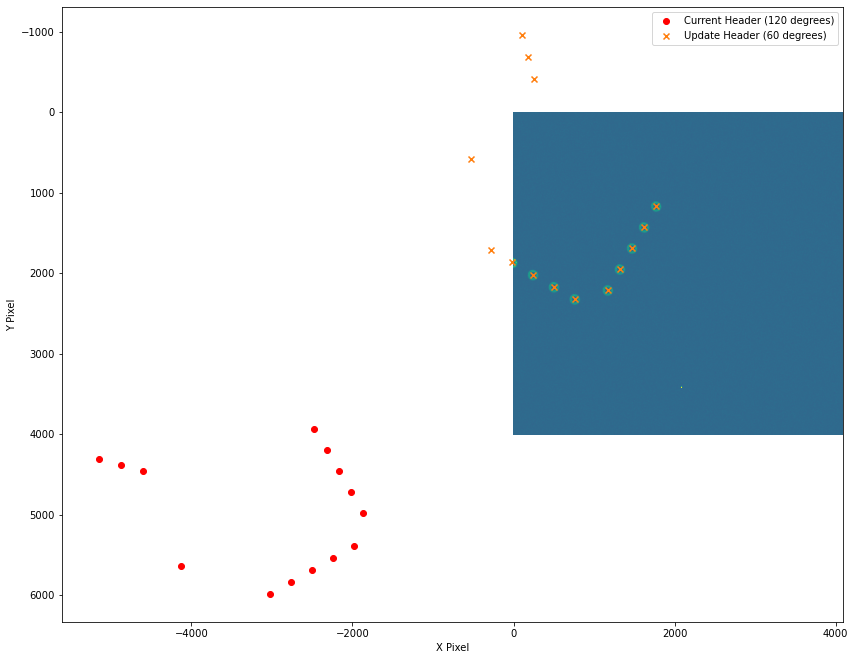

In [192]:
fig = plt.figure(figsize=(14,14))
plt.imshow(postISR_exp.image.array, vmax=60)
plt.scatter(x, y, c='r', label='Current Header (120 degrees)')
plt.scatter(x_new, y_new, c='C1', marker='x', label='Update Header (60 degrees)')
plt.legend()
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')

In [124]:
from lsst.obs.base import createInitialSkyWcs, createInitialSkyWcsFromBoresight

In [141]:
new_wcs = createInitialSkyWcsFromBoresight(expVisitInfo.getBoresightRaDec(), (180 - expMetadata['ROTANG'])*lsst.geom.degrees, postISR_exp.getDetector())

In [187]:
x_new, y_new = new_wcs.skyToPixelArray(refCatDf['coord_ra'].values, refCatDf['coord_dec'].values)

In [184]:
newHeaderVisitInfo = postISR_exp_newHeader.getInfo().getVisitInfo()

In [115]:
expInfo = postISR_exp.getInfo()

In [116]:
expVisitInfo = expInfo.getVisitInfo()

In [117]:
expVisitInfo.getBoresightRaDec()

SpherePoint(0.0*geom.degrees, 0.0*geom.degrees)

In [167]:
rotAng = expVisitInfo.getBoresightRotAngle()

In [168]:
rotAng.asDegrees()

119.99999999999999

In [186]:
newHeaderVisitInfo.getBoresightRotAngle().asDegrees()

59.99999999999999

In [120]:
expMetadata = expInfo.getMetadata()

In [121]:
expMetadata['ROTANG']

120.0

In [185]:
expMetadata_newHeader = postISR_exp_newHeader.getInfo().getMetadata()
expMetadata_newHeader['ROTANG']

60.0